In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
kahovka_cells = pd.read_csv("C:/Users/mkrooted/Uni/diploma/data/kahovka.txt", header=None, names=['cell_id'])
kahovka_cells = kahovka_cells.cell_id
kahovka_cells

0       175
1       176
2       177
3       178
4       179
       ... 
446    3133
447    3134
448    3164
449    3165
450    3196
Name: cell_id, Length: 451, dtype: int64

In [3]:
kahovka_cells_set = set(kahovka_cells)

In [4]:
cells_area = pd.read_csv("C:/Users/mkrooted/Uni/diploma/data/coords-area.txt", sep="\s+").drop(columns=['Cell', 'Longitude', 'Latitude'])
cells_area

,Area
0,1000000.0
1,1000000.0
2,1000000.0
3,1000000.0
4,1000000.0
...,...
8051,256000000.0
8052,256000000.0
8053,256000000.0
8054,256000000.0


---

In [14]:
tdep_data_dir = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\results-2\\TDepCs137"
rainfall_data_dir = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\results-2\\W_TotalRainfall"
wind_data_dir = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\results-2\\W_WindField10m"

In [28]:
import datetime, os

def filename2datetime(fname: str):
    if '.' in fname:
        datestr = fname.split('.')[1]
    else: 
        datestr = fname
    y = int(datestr[0:4])
    m = int(datestr[4:6])
    d = int(datestr[6:8])
    hour = int(datestr[8:10])
    minute = int(datestr[10:12])
    return datetime.datetime(y, m, d, hour, minute)

def get_data_tdep():
    files = os.listdir(tdep_data_dir)
    times = [ filename2datetime(f) for f in files ]
    data = [ pd.read_csv(f'{tdep_data_dir}\\{f}', header=None, sep='\s+') for f in files ]
    # we need only last datapoint cause property is cumulative
    data = [ np.array(d[d.columns[-1]]) for d in data ]
    return pd.DataFrame({'start_time': times, 'tdep_final': data})

def get_data_rainfall():
    files = os.listdir(rainfall_data_dir)
    times = [ filename2datetime(f) for f in files ]
    data = [ pd.read_csv(f'{rainfall_data_dir}\\{f}', header=None, sep='\s+') for f in files ]
    # there should be only one field
    data = [ np.array(d[d.columns[-1]]) for d in data ]
    return pd.DataFrame({'start_time': times, 'rainfall_final': data})

def get_data_wind():
    files = os.listdir(wind_data_dir)
    times = [ filename2datetime(f) for f in files ]
    data_from_files = [ pd.read_csv(f'{wind_data_dir}\\{f}', header=None, sep='\s+') for f in files ]
    # first field is cell number. the following fields are pairs of x/y wind speeds.
    num_fields = len(data_from_files[0].columns)
    num_observ = (num_fields-1)//2
    num_cells = len(data_from_files[0][0])
    result = []
    for d in data_from_files:
        # cell_ids = d[0]
        wind_history = np.zeros((num_cells, num_observ, 2))
        for i in range(0, num_observ):
            wind_history[:,i,0] = d[1+i*2]
            wind_history[:,i,1] = d[1+i*2+1]
        result.append(wind_history)
    return pd.DataFrame({'start_time': times, 'wind_history': result})

In [8]:
sample_data_path = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\results-2\\W_WindField10m\\0f7ffc9e-c0a8-0014-6f0c-a69241b6e124.202207011955"

---

## Data loading

### Wind

`wind_data[period number][cell number][0/1 for x/y]`

In [29]:
wind_data = get_data_wind()
wind_data

,start_time,wind_history
0,2022-07-01 19:55:00,"[[[0.69340545, -3.3388488], [0.21407717, -3.68..."
1,2022-07-02 05:34:00,"[[[-4.880126, -3.8366716], [-3.8513846, -3.697..."
2,2022-07-02 22:46:00,"[[[1.324215, -2.8304386], [-0.20824951, -2.483..."
3,2022-07-04 14:19:00,"[[[2.321182, -1.5820554], [2.1421092, -1.15840..."
4,2022-07-05 18:47:00,"[[[0.7748647, -0.8844176], [0.83207494, -0.200..."
...,...,...
218,2023-02-04 13:36:00,"[[[-0.54570574, -1.527094], [-1.4656001, -1.30..."
219,2023-02-04 22:57:00,"[[[-2.9870539, -3.3427148], [-0.91877455, -2.5..."
220,2023-02-06 06:03:00,"[[[-4.345418, -6.806369], [-4.327753, -7.28703..."
221,2023-02-07 13:34:00,"[[[-3.754423, -8.385823], [-4.2699423, -7.9443..."


In [30]:
wind_data.wind_history[0][8000], wind_data.wind_history[0][8000].shape

(array([[ 0.584725  , -6.1594467 ],
        [-0.70692694, -7.012069  ],
        [-1.3299156 , -6.0794277 ],
        [-0.42836794, -5.083401  ],
        [ 1.5576735 , -4.0975485 ],
        [ 2.403324  , -4.2921977 ],
        [ 2.5614264 , -5.060894  ],
        [ 2.202534  , -6.1879253 ],
        [ 2.090227  , -7.033813  ],
        [ 2.1997182 , -7.591057  ],
        [ 1.9414387 , -7.8988605 ],
        [ 1.945366  , -8.348376  ],
        [ 1.7265834 , -9.100201  ],
        [ 1.8610477 , -9.273963  ],
        [ 1.9633378 , -9.403254  ],
        [ 1.8042305 , -9.982484  ],
        [ 1.2504519 , -9.856281  ],
        [ 0.97364384, -9.556622  ],
        [ 1.1089665 , -8.680183  ],
        [ 1.388065  , -7.7587347 ],
        [ 0.91772664, -6.826965  ],
        [ 1.1585257 , -5.4743047 ],
        [ 0.7753302 , -4.8697314 ],
        [ 0.30526322, -4.1477613 ]]),
 (24, 2))

In [34]:
wind_data.to_pickle('saved/wind_data.pkl')

### Rain

`rain_data[period number][cell number]`

In [32]:
rain_data = get_data_rainfall()
rain_data

,start_time,rainfall_final
0,2022-07-01 19:55:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2022-07-02 05:34:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2022-07-02 22:46:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2022-07-04 14:19:00,"[0.035863027, 0.15945688, 0.15945688, 0.159456..."
4,2022-07-05 18:47:00,"[4.6061316, 3.3568287, 3.3568285, 3.3568285, 3..."
...,...,...
218,2023-02-04 13:36:00,"[0.010891917, 0.011067579, 0.011067579, 0.0110..."
219,2023-02-04 22:57:00,"[0.012969203, 0.017166331, 0.017166331, 0.0171..."
220,2023-02-06 06:03:00,"[0.049493603, 0.043491147, 0.043491147, 0.0434..."
221,2023-02-07 13:34:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [33]:
rain_data.to_pickle('saved/rain_data.pkl')

### Radioactive deposit
`dep_data[period number][cell number]`

In [35]:
dep_data = get_data_tdep()

In [36]:
dep_data

,start_time,tdep_final
0,2022-07-01 19:55:00,"[1354.9042, 1681.1763, 2091.0132, 1881.2877, 1..."
1,2022-07-02 05:34:00,"[1023.44543, 729.9161, 465.06067, 305.74167, 2..."
2,2022-07-02 22:46:00,"[0.0, 0.0, 0.0, 0.0, 0.02025737, 11.653584, 21..."
3,2022-07-04 14:19:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 63.13..."
4,2022-07-05 18:47:00,"[6925.5093, 5282.406, 6638.792, 9146.197, 8883..."
...,...,...
218,2023-02-04 13:36:00,"[11606.796, 12324.691, 12639.54, 10821.229, 58..."
219,2023-02-04 22:57:00,"[2668.4563, 5091.6455, 6743.5703, 7127.751, 76..."
220,2023-02-06 06:03:00,"[415.4246, 1301.7596, 3061.989, 5065.3784, 553..."
221,2023-02-07 13:34:00,"[857.5596, 1463.7555, 2022.8812, 2436.5554, 27..."


In [37]:
dep_data.to_pickle('saved/dep_data.pkl')

---

## Kahovka deposit

In [38]:
TOTAL_CELL_NUMBER = 8056

In [39]:
def calculate_kahovka_deposit(cell_values):
    sum = 0
    for i in range(TOTAL_CELL_NUMBER):
        if i in kahovka_cells_set:
            sum += cell_values[i] * cells_area.Area[i]
    return sum

In [41]:
kahovka_deposits = dep_data.copy()
kahovka_deposits.tdep_final = kahovka_deposits.tdep_final.apply(calculate_kahovka_deposit)
kahovka_deposits['log_tdep_final'] = np.log10(kahovka_deposits.tdep_final)

c:\Users\mkrooted\.conda\envs\sci\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
kahovka_deposits

,start_time,tdep_final,log_tdep_final
0,2022-07-01 19:55:00,4.511234e+07,7.654295
1,2022-07-02 05:34:00,2.018999e+08,8.305136
2,2022-07-02 22:46:00,0.000000e+00,-inf
3,2022-07-04 14:19:00,3.289296e+11,11.517103
4,2022-07-05 18:47:00,5.906710e+11,11.771346
...,...,...,...
218,2023-02-04 13:36:00,1.116127e+11,11.047714
219,2023-02-04 22:57:00,0.000000e+00,-inf
220,2023-02-06 06:03:00,0.000000e+00,-inf
221,2023-02-07 13:34:00,0.000000e+00,-inf


In [43]:
kah_dep_vals = kahovka_deposits.tdep_final
log_kah_dep_vals = kahovka_deposits.log_tdep_final
kah_dep_vals.describe()

count    2.230000e+02
mean     2.315736e+12
std      4.654628e+12
min      0.000000e+00
25%      2.170987e+11
50%      9.608241e+11
75%      2.055023e+12
max      3.929688e+13
Name: tdep_final, dtype: float64

Text(0.5, 1.0, 'log Bq kahovka histogram.')

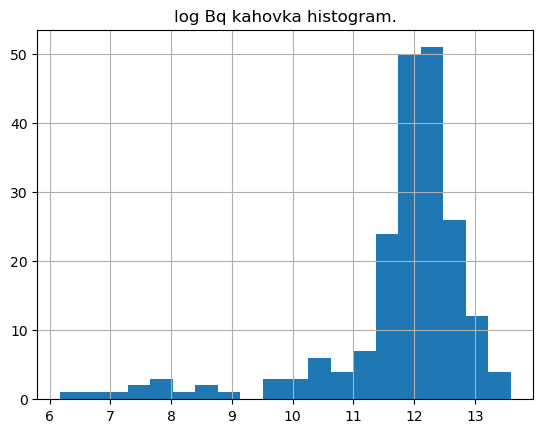

In [44]:
log_kah_dep_vals = log_kah_dep_vals[~np.isinf(log_kah_dep_vals)]
log_kah_dep_vals.hist(bins=20)
plt.title('log Bq kahovka histogram.')

In [45]:
kahovka_deposits.to_pickle('saved/kahovka_deposits.pkl')

---